<a href="https://colab.research.google.com/github/PrakashRanjanShrivastava/Customer-_segmentation/blob/main/My_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**::
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.


Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment

Content Attributes::


People--

ID: Customer's unique identifier


Year_Birth: Customer's birth year


Education: Customer's education level


Marital_Status: Customer's marital status


Income: Customer's yearly household income


Kidhome: Number of children in customer's household


Teenhome: Number of teenagers in customer's household


Dt_Customer: Date of customer's enrollment with the company


Recency: Number of days since customer's last purchase


Complain: 1 if the customer complained in the last 2 years, 0 otherwise


Products--


MntWines: Amount spent on wine in last 2 years


MntFruits: Amount spent on fruits in last 2 years


MntMeatProducts: Amount spent on meat in last 2 years


MntFishProducts: Amount spent on fish in last 2 years


MntSweetProducts: Amount spent on sweets in last 2 years


MntGoldProds: Amount spent on gold in last 2 years



Promotion--


NumDealsPurchases: Number of purchases made with a discount


AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise


AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise


AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise


AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise


AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise


Response: 1 if customer accepted the offer in the last campaign, 0 otherwise



Place--


NumWebPurchases: Number of purchases made through the company’s website


NumCatalogPurchases: Number of purchases made using a catalogue


NumStorePurchases: Number of purchases made directly in stores


NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
from google.colab import files
Data_to_load =files.upload()

Saving marketing_campaign1.csv to marketing_campaign1.csv


In [3]:
df_mc = pd.read_csv(io.BytesIO(Data_to_load['marketing_campaign1.csv']))

# ***Exploratory Data Analysis***

In [4]:
df_mc

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
df_mc.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df_mc.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Now , there is missing values in column Martial. So, we treat the missing values by KNN imputer.

In [8]:
from sklearn.impute import KNNImputer


In [9]:
imputer =  KNNImputer(n_neighbors= 5)
df1 = pd.DataFrame(imputer.fit_transform(df_mc[['Income']]))

In [10]:
df1.rename(columns={0: 'Income'},inplace=True)

In [11]:
df1.isnull().sum()

Income    0
dtype: int64

Now we will concat the orginal data and treated column(Martial)

In [12]:
drop_data = df_mc.drop(['Income'],axis = 1)

In [13]:
drop_data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [14]:
df2 = pd.concat([df1,drop_data],axis = 1)

In [15]:
df2.isnull().sum()

Income                 0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# **Univariate Analysis**

From the above data we can say that Total Amount sppent = sum of all amount spent on all products.

In [16]:
df2['Total_Amount_spent'] = df2['MntWines'] + df2['MntFruits']+df2['MntMeatProducts']+df2['MntFishProducts']+df2['MntSweetProducts']+df2['MntGoldProds']

Year Birth

We need to convert year birth to an age feature

In [17]:
from datetime import datetime

In [18]:
df2['Age']  = df2['Year_Birth'].apply(lambda x: datetime.now().year - x)

In [19]:
df2['Age'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

Now we will  plot histogram of coustomer Age to check the distribution.

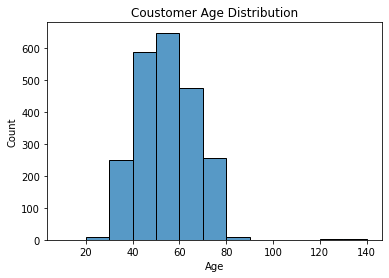

<Figure size 432x288 with 0 Axes>

In [20]:
sns.histplot(data = df2, x='Age',bins = list(range(10,150,10)))
plt.title('Coustomer Age Distribution')
plt.show()
plt.savefig("Age.png");

`It is seen that most of our customer's age distribution is within the range 41-60`

 **Education**

In [21]:
df2['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [22]:
df2['Education'] = df2['Education'].replace({'Graduation':'Graduate','Phd':'Post_Graduate','Master':'Post_Graduate','2n Cycle':'Psot_Graduate','Basic':'Under_Graduate'})

In [23]:
df2['Education'].value_counts()

Graduate          1127
PhD                486
Post_Graduate      370
Psot_Graduate      203
Under_Graduate      54
Name: Education, dtype: int64

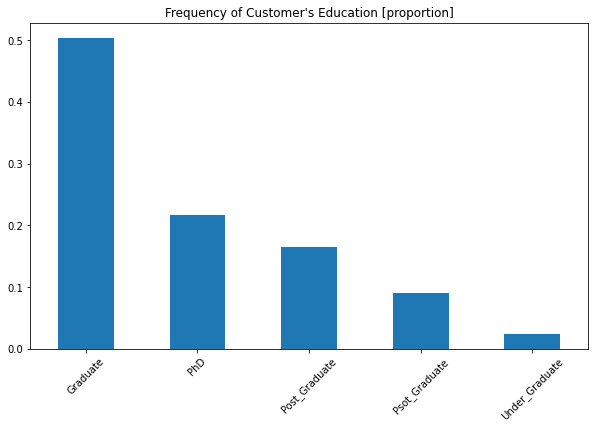

In [24]:
df2['Education'].value_counts(normalize = True).plot.bar(figsize  = (10,6))
plt.xticks(rotation = 45)
plt.title("Frequency of Customer's Education [proportion]");

It is seen from the above summary that half of our customer's highest education level is first degree graduation. About 50% of customers have their education level at bachelour's degree which is then followed by customers with postgraduate level of education

**Marital Status**

In [25]:
df2['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [26]:
df2['Marital_Status']  =df2['Marital_Status'].replace({"Together":"Married", "Absurd":"Single", "Divorced":"Single", "Alone":"Single", "YOLO":"Single","Widow":"Single","Married":"Married","Single":"Single"})

In [27]:
df2['Marital_Status'].value_counts()

Married    1444
Single      796
Name: Marital_Status, dtype: int64

In [28]:
import plotly.express as px

In [29]:
fig = px.bar(
    df2["Marital_Status"].value_counts(normalize=True),
    title = "Proportion of Customer's Marital Status",
    height=500
)
fig.update_layout(yaxis_title = "Freuency [proportion]")
fig.show()


`It is seen from the above summary that close to 65% of customers are married while the remaining close to 35% are single`



**Income**

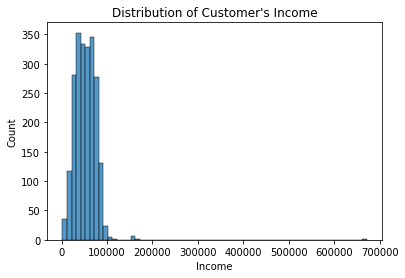

In [30]:
sns.histplot(data=df2, x="Income", binwidth=1e4)
plt.title("Distribution of Customer's Income");

`From above graph it can be seen that the majority of the coustmer earn between 0-100k, but there are some coustomer that whose income is way more than others above 650k`

**Kid Home**

In [31]:
df2["Kidhome"].unique()

array([0, 1, 2])

Text(0.5, 1.0, 'Proportion of coustomer kid')

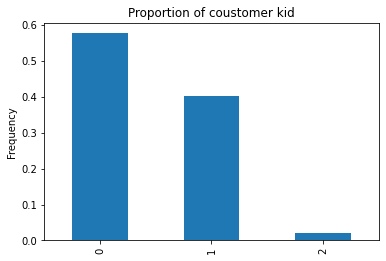

In [32]:
df2['Kidhome'].value_counts(normalize = True).plot.bar()
plt.ylabel('Frequency')
plt.title('Proportion of coustomer kid')

`From above graph we can see that most of coustomer having no kids, some of them have 1 kid and  only few of them are having 2 kids.`

**Teen Home**

In [33]:
df2['Teenhome'].unique()

array([0, 1, 2])

Text(0.5, 1.0, 'Proportion of coustmer Teen home')

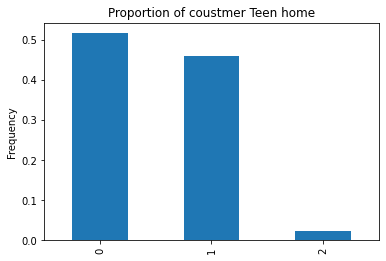

In [34]:
df2['Teenhome'].value_counts(normalize = True).plot.bar()
plt.ylabel('Frequency')
plt.title('Proportion of coustmer Teen home')

`Above half of customer's do not have kids at home.`

**Total Children**

In [35]:
df2['Total_Children'] =df2["Kidhome"] +df2['Teenhome']

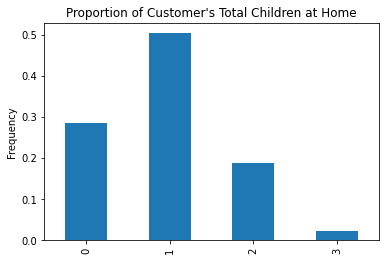

In [36]:
df2["Total_Children"].value_counts(normalize=True).sort_index().plot.bar()
plt.ylabel("Frequency")
plt.title("Proportion of Customer's Total Children at Home");

`Close to half of entire customers have the total number of 1 children, while in the remaining half above quarter of customers have no children at all.`

**Total_Amount_spent**

In [37]:
df2["Total_Amount_spent"].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Total_Amount_spent, dtype: float64

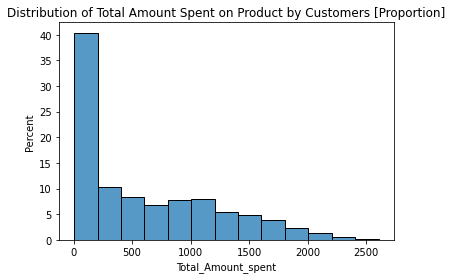

In [38]:
sns.histplot(data = df2, x="Total_Amount_spent",binwidth = 200,stat = 'percent')
plt.title("Distribution of Total Amount Spent on Product by Customers [Proportion]");

`it can be seen from the above summary that close to half of customers total amount spent on the companies product is with 0 to 200.`

# **Bivariate_Analysis**

**Age VS Total Amount Spent**

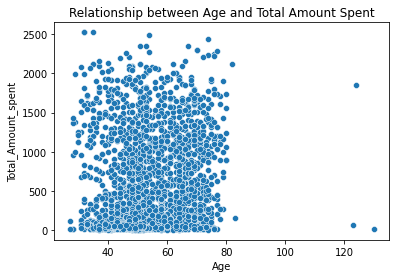

In [39]:
sns.scatterplot(data = df2,x ='Age',y = 'Total_Amount_spent')
plt.title('Relationship between Age and Total Amount Spent');

`There is less positive  or we can say no correlation exist  between age and total amount spent (i.e the above sumarry tells us that age does not infer the total amount of money that will be spent by customers).`

In [40]:
def group_age(age):
  if age <20:
    return "11-20"
  elif age >20 and age<31:
    return "21-30"
  elif age >30 and age <41:
    return "31-40"
  elif age >40 and age <51:
    return "41-50"
  elif age >50 and age <61:
    return "51-60"
  elif age >60 and age<71:
    return "61-70"
  elif age >70 and age <81:
    return "71-80"
  elif age> 80 :
    return "80"

In [41]:
df2['Age_group'] = df2['Age'].apply(group_age)

In [42]:
order = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80", ">80"]

In [43]:
mask = df2.groupby('Age_group')['Total_Amount_spent'].median()
mask  = mask.reset_index()
fig = px.bar(data_frame = mask,x = "Age_group", y = "Total_Amount_spent", height = 500)

annotation = []
for x,y in zip(mask['Age_group'],mask['Total_Amount_spent']):
  annotation.append(
      dict(x=x, y=y +20,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)
fig.show()

`From the above summary we can see that average values for the distribution of each Age value. It seen that the group who spend most on average is customers within the range of 21-30, which is then followed by customers in the age range of 71-80. Let's look at the distribution of the comparison.`

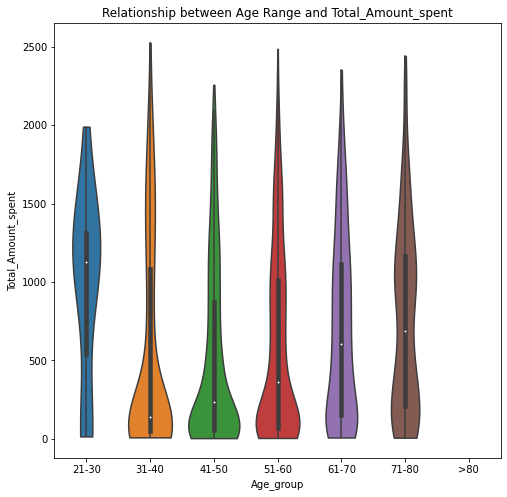

In [44]:
plt.figure(figsize=(8, 8))
sns.violinplot(x="Age_group", y="Total_Amount_spent", data=df2, cut=0, order=order)
plt.title("Relationship between Age Range and Total_Amount_spent");

In [45]:
from scipy.stats import iqr

In [46]:
iqr = iqr(df2["Income"], nan_policy="omit")


low = np.nanquantile(df2["Income"], 0.25) - 1.5 * iqr
high = np.nanquantile(df2["Income"], 0.75) + 1.5 * iqr

In [47]:
df_cut = df2[df2["Income"].between(low, high)]

In [48]:
mask = df_cut.groupby("Age_group")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Age_group", y="Income", height=500)

annotation = []
for x, y in zip(mask["Age_group"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

`Interesting to see that the age group that earns more on average are the customers within above 80+, followed by customers within 71-80. Apart from customer age within 21-30. We can see a trend which postulates that as the age group increases so do the Income.`

In [49]:
(df_cut[df_cut["Age_group"] == "21-30"]["Income"]).describe()

count       15.000000
mean     63576.866667
std      26909.456211
min       7500.000000
25%      52669.500000
50%      74293.000000
75%      80375.500000
max      95529.000000
Name: Income, dtype: float64

**Education VS Total Amount Spent**

In [50]:
mask = df2.groupby('Education')['Total_Amount_spent'].median()
mask  = mask.reset_index()
fig = px.bar(data_frame= mask,x = 'Education',y= 'Total_Amount_spent',height = 500,
             title ="Relationsip Between Education and Total Amount Spent [Average Spent]")

annotation = []
for x, y in zip(mask["Education"], mask["Total_Amount_spent"]):
    annotation.append(
        dict(x=x, y=y +1500,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)

fig.show()

`Interesting from the above summary we see that there isn't much difference between average spent for both graduate and Postgradute customer. However we see much drop for customers who have undergraduate level of education. We can postulate that customers who have Graduate education level and above spends approximately 7 times than customers who are undergraduate. That's way too much`.

**Education VS Income**

*Since income is normally disstributed and there are some outliers in it. We will make use of the df_cut dataframe so we can accurately get better conclusion.*

In [51]:
mask = df_cut.groupby("Education")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Education", y="Income", height=500,
            title = "Relationsip Between Customer's Education Level and Income [Average Income]")

annotation = []
for x, y in zip(mask["Education"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +1500,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)

fig.show()

`We can see from the above summary that Customers with Graduate and Post graduate education level earns 2 times above than customers who have undergraduate education level`.

In [52]:
df2.head()

,Income,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Amount_spent,Age,Total_Children,Age_group
0,58138.0,5524,1957,Graduate,Single,0,0,4/9/2012,58,635,...,0,0,0,3,11,1,1617,66,0,61-70
1,46344.0,2174,1954,Graduate,Single,1,1,8/3/2014,38,11,...,0,0,0,3,11,0,27,69,2,61-70
2,71613.0,4141,1965,Graduate,Married,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,776,58,0,51-60
3,26646.0,6182,1984,Graduate,Married,1,0,10/2/2014,26,11,...,0,0,0,3,11,0,53,39,1,31-40
4,58293.0,5324,1981,PhD,Married,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,422,42,1,41-50


**Marital and Total Amount**

In [53]:
mask  = df2.groupby('Marital_Status')['Total_Amount_spent'].median()
mask = mask.reset_index()
fig = px.bar(data_frame = mask, x = 'Marital_Status', y  = 'Total_Amount_spent', height= 500,title ="Relationship between Customer's Marital Status and Total Amuont Spent [Average Spent]")

annotation = []
for x,y in zip(mask['Marital_Status'],mask['Total_Amount_spent']):
  annotation.append(
      dict(x =x,y = y + 50,
      text=str(round(y, 2)) + '$',
      font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
  )

fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)

fig.show()



`We can see from the above summary that there isn't relationship between customer's marital status and the average amount spent.`

Marital_status vs Income

In [67]:
mask = df_cut.groupby("Marital_Status")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Marital_Status", y="Income", height=500, 
             title="Relationship between Customer's Marital Status and Income [Average Income]")

annotation = []
for x, y in zip(mask["Marital_Status"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

`Also In terms of Marital Status and Income there isn't relationship concerning that. Customer's earn approximately equal.`

**Kids_Home Vs Total_Amount_spent**

In [55]:
df2["Kidhome"].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [75]:
mask = df2.groupby("Kidhome")["Total_Amount_spent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Kidhome", y="Total_Amount_spent", height=500, 
             title="Relationship between Customer's Kid and Amount Spent [Average]")

annotation = []
for x, y in zip(mask["Kidhome"], mask["Total_Amount_spent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

`We can see from the above summary that customer's who don't have kids at home spend way high than those who have. They spend about 12 times than others on average`.

KIDsHome vs Income

In [78]:
mask = df_cut.groupby("Kidhome")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Kidhome", y="Income", height=500, title="Relationship between Marital Status and Total Amount Spent")

annotation = []
for x, y in zip(mask["Kidhome"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

`We can see that customer's who don't have kids earn more than others.`

**Teens Home Vs Total_Amount_spent**


In [80]:
mask = df2.groupby("Teenhome")["Total_Amount_spent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Teenhome", y="Total_Amount_spent", height=500, title="Relationship between Marital Status and Total Amount Spent")

annotation = []
for x, y in zip(mask["Teenhome"], mask["Total_Amount_spent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_layout(annotations=annotation)
fig.show()

`We can see from the above relationship the upward trend concerning Teens at home and Average Amount Spent. As the number of teens increase so do the average amount spent increases.`

Total Children VS Amount Spent.

In [83]:
mask = df2.groupby("Total_Children")["Total_Amount_spent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Total_Children", y="Total_Amount_spent", height=500,
             title="Relationship between Marital Status and Amount Spent [Average Spent]")

annotation = []
for x, y in zip(mask["Total_Children"], mask["Total_Amount_spent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_layout(annotations=annotation)
fig.show()

` As the no.of Children increses the average amonut spent decreases`

In [86]:
df_cut

,Income,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Amount_spent,Age,Total_Children,Age_group
0,58138.0,5524,1957,Graduate,Single,0,0,4/9/2012,58,635,...,0,0,0,3,11,1,1617,66,0,61-70
1,46344.0,2174,1954,Graduate,Single,1,1,8/3/2014,38,11,...,0,0,0,3,11,0,27,69,2,61-70
2,71613.0,4141,1965,Graduate,Married,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,776,58,0,51-60
3,26646.0,6182,1984,Graduate,Married,1,0,10/2/2014,26,11,...,0,0,0,3,11,0,53,39,1,31-40
4,58293.0,5324,1981,PhD,Married,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,422,42,1,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,10870,1967,Graduate,Married,0,1,13-06-2013,46,709,...,0,0,0,3,11,0,1341,56,1,51-60
2236,64014.0,4001,1946,PhD,Married,2,1,10/6/2014,56,406,...,1,0,0,3,11,0,444,77,3,71-80
2237,56981.0,7270,1981,Graduate,Single,0,0,25-01-2014,91,908,...,0,0,0,3,11,0,1241,42,0,41-50
2238,69245.0,8235,1956,Post_Graduate,Married,0,1,24-01-2014,8,428,...,0,0,0,3,11,0,843,67,1,61-70


**Income VS Total AmountSpent**

In [92]:
fig = px.scatter(data_frame=df_cut, x="Income",
                 y="Total_Amount_spent", title="Relationship Between Customer's Income and Total Amount Spent",
                height=500,
                color_discrete_sequence = px.colors.qualitative.G10[1:])
fig.show()

`We can see from the above summary that Income of a customers really determine the total amount to be spend on product. As a customer's income increase so do what they buy increases.`

# **Multivariate Analysis**


***Education VS Income VS TotalAmountSpent***

In [93]:
fig = px.scatter(
    data_frame=df_cut,
    x = "Income",
    y= "Total_Amount_spent",
    title = "Relationship between Income VS Total Amount Spent Based on Education",
    color = "Education",
    height=500
)
fig.show()

 Total Children VS Income VS TotalAmountSpent

In [94]:
fig = px.scatter(
    data_frame=df_cut,
    x = "Income",
    y= "Total_Amount_spent",
    title = "Relationship between Income VS Total Amount Spent Based on Education",
    color = "Total_Children",
    height=500
)
fig.show()

# **Conclusion From EDA**




`Firstly from the EDA we saw that Income was really the key indicator that was determined the amount a customer will spend.`



`Also In terms of Education we noticed customers with graduate education level and above tends to spend 12 times higher than those customers with undergraduate education level. The reason for this is because customers with graduate education level and above earns above 2 times than customers with undergradute education level`.



`Also we noticed a trends in terms of total children and total amount spent. We saw that on average there was a decline on the amount spent as the total number of children increases.I.e, as children increases so do the amount spent on average reduces`
 

# **We will build the Kmeans Model using two Features to Segment the *Customers Demographic and Behaviour* "Income" and "Total Amount Spent"**

---



In [95]:
df2["Income"].fillna(df2["Income"].median(), inplace=True)

In [96]:
data = df2[['Income','Total_Amount_spent']]

In [97]:
df_log = np.log(data)

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [99]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

In [102]:
errors = []
for k in range(1,11):
  model = KMeans(n_clusters = k,random_state = 45)
  model.fit(df_scaled)
  errors.append(model.inertia_)


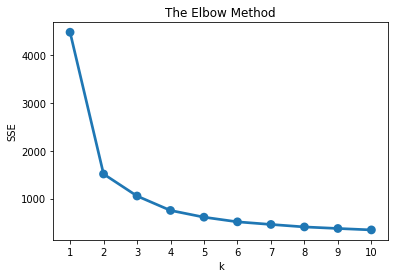

In [103]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.savefig("Elbow.png")

 We can also Make use of Knee Locator to determine Optimal Cluster

In [105]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
from kneed import KneeLocator
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 3


We  will Build the 3 cluster model

In [107]:
model = KMeans(n_clusters = 3,random_state = 40)
model.fit(df_scaled)

KMeans(n_clusters=3, random_state=40)

In [108]:
data = data.assign(ClusterLabel= model.labels_)


In [109]:
data.groupby("ClusterLabel")[["Income", "Total_Amount_spent"]].median()

,Income,Total_Amount_spent
ClusterLabel,,
0,25271.0,43.0
1,69063.0,1067.0
2,42596.5,144.5


In [110]:
fig = px.scatter(
    data_frame=data,
    x = "Income",
    y= "Total_Amount_spent",
    title = "Relationship between Income VS Total Amount Spent",
    color = "ClusterLabel",
    height=500
)
fig.show()

**Interpreting the cluster Label.**

---




`Cluster 0: Customers with low Income and Low spending.`
 


`Cluster 1: Customer with moderate Income and Moderate spending.`


`Cluster 3: Custoemers who earn much and spend much`.


***Building The Kmeans Model with Three Features***

In [111]:
data1 = df2[["Age", "Income", "Total_Amount_spent"]]

In [112]:
df_log1 = np.log(data1)
std_scaler = StandardScaler()
df_scaled1 = std_scaler.fit_transform(df_log1)

In [113]:
sse = {}
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    sse[k] = model.inertia_

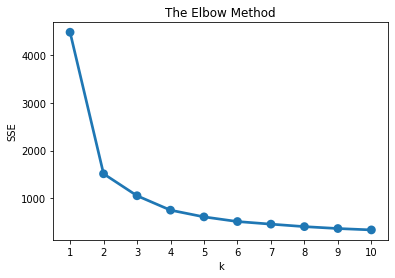

In [114]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Here Also the graph bends totaly on 3 . So, we should take 3 no. of clusters

In [120]:
model1 = KMeans(n_clusters=3, random_state=42)
model1.fit(df_scaled1)


data2 = data1.assign(ClusterLabel= model1.labels_)

In [121]:
result = data2.groupby("ClusterLabel").agg({"Age":"mean", "Income":"median", "Total_Amount_spent":"median"}).round()

In [122]:
result

,Age,Income,Total_Amount_spent
ClusterLabel,,,
0,66.0,62814.0,822.0
1,50.0,31801.0,54.0
2,45.0,67402.0,1001.0


***Interpreting the cluster label***


`Cluster 0: Middle Age High Rollers (High Income and High Spending)`
 


`Cluster 1: Middle Age Average Joes (Low Income Low Spend).`
 


`Cluster 2: Old Age High Rollers (High Income and High Spending).`


`Cluster 3: Old Age Average Joes (Low Income Low Spend).`

# **Visualizing The Result**

In [123]:
fig = px.scatter_3d(data_frame=data2, x="Income", 
                    y="Total_Amount_spent", z="Age", color="ClusterLabel", height=550,
                   title = "Visualizing Cluster Result Using 3 Features")
fig.show()

# ***Interpreting Result:--***

`Cluster 1 depicts young customers that earn way lot and also spend a lot.`

`Cluster 2 translates to old customer that earn lot and also spend high.`

`Cluster 3 depicts young customers that earn lows and also spend low.`

**We can do Further Analysis Based on :**


Geographic Segmentation.

Psychographic Segmentation.

Technographic Segmentation.

Needs-based Segmentation.

Value-based Segmentation.